KeyboardInterrupt: 

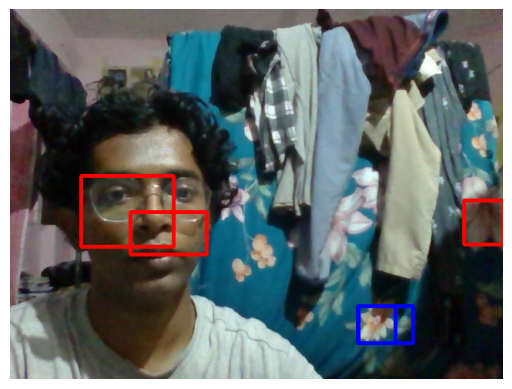

In [1]:
import cv2
import numpy as np
import pytesseract
from IPython.display import display, clear_output
import matplotlib.pyplot as plt

# Optional: Set path for tesseract if using Windows
# pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

# Start webcam
cap = cv2.VideoCapture(0)
print("Press 'q' to stop the webcam feed.")

while True:
    ret, frame = cap.read()
    if not ret:
        continue  # Skip frame if failed to read

    # Flip the frame to show mirror image
    frame = cv2.flip(frame, 1)

    # Convert frame to HSV (for color-based fire detection)
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define range for fire-like colors (red, orange, yellow)
    lower_fire = np.array([5, 50, 50])  # lower bound for fire color
    upper_fire = np.array([15, 255, 255])  # upper bound for fire color

    # Mask to detect fire colors
    mask_fire = cv2.inRange(hsv, lower_fire, upper_fire)

    # Find contours of fire (highlighting fire in the frame)
    contours, _ = cv2.findContours(mask_fire, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    for contour in contours:
        if cv2.contourArea(contour) > 1000:  # Filter small noise
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 0, 255), 3)

    # Smoke detection using grayscale and edge detection
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, 100, 200)

    # Show edge-detected areas
    contours_smoke, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
    for contour in contours_smoke:
        if cv2.contourArea(contour) > 500:  # Filter small areas of smoke
            x, y, w, h = cv2.boundingRect(contour)
            cv2.rectangle(frame, (x, y), (x + w, y + h), (255, 0, 0), 3)

    # Display fire and smoke areas
    rgb_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    clear_output(wait=True)
    plt.imshow(rgb_frame)
    plt.axis('off')
    display(plt.gcf())

    # Stop the webcam feed when pressing 'q'
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()
